In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
plt.style.use(['classic', 'seaborn-deep', 'seaborn-dark'])
sns.set(style='whitegrid')

In [4]:
with open('json/baseline_acc.json') as f:
    baseline_acc = json.loads(f.read())

In [5]:
len(baseline_acc['train_acc'])

55

In [6]:
len(baseline_acc['validation_acc'])

11

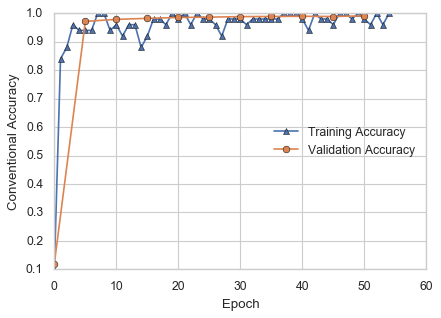

In [7]:
plt.figure(figsize=(6, 4))
x = np.arange(0, 55, 1)
x_v = np.arange(0, 55, 5)
plt.plot(x, 
         baseline_acc['train_acc'],
         marker='^',
        label = 'Training Accuracy')
plt.plot(x_v, 
         baseline_acc['validation_acc'],
        marker='o',
        label = 'Validation Accuracy')


plt.ylabel('Conventional Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=5)
plt.savefig('plots/orig_acc')
plt.show()

In [8]:
baseline_acc['acc_buffer']

0.9917

In [9]:
import pickle
# with (open("output/bi_acc.p", "rb")) as openfile:
#     bi_acc = pickle.load(openfile)

with open('train_acc.p', 'rb') as fp:
    robust_train_acc = pickle.load(fp)
    
with open('validation_acc.p', 'rb') as fp:
    robust_val_acc = pickle.load(fp)

with open('acc_buffer.p', 'rb') as fp:
    robust_acc_buffer = pickle.load(fp)



In [10]:
len(robust_train_acc)

55

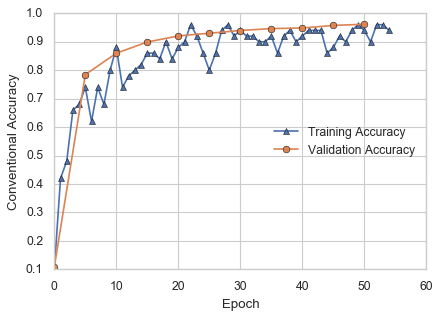

In [13]:

plt.figure(figsize=(6, 4))
x = np.arange(0, 55, 1)
x_v = np.arange(0, 55, 5)
plt.plot(x, 
         robust_train_acc,
         marker='^',
         label = 'Training Accuracy'
        )
plt.plot(x_v, 
         robust_val_acc,
        label = 'Validation Accuracy',
         marker='o')

plt.ylabel('Conventional Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=5)
plt.savefig('plots/robust_acc')
plt.show()

Evaluation

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import os
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data

import mnist_data
import cnn_model


MODEL_DIRECTORY = "model/model.ckpt"
# TEST_BATCH_SIZE = 5000
batch_size = 500


# Import data
#     PIXEL_DEPTH = mnist_data.PIXEL_DEPTH
PIXEL_DEPTH = 255
mnist = input_data.read_data_sets('data/', one_hot=True)

is_training = tf.placeholder(tf.bool, name='MODE')

# tf Graph input
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])  # answer
y = cnn_model.CNN(x, is_training=is_training)

# Add ops to save and restore all the variables
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer(), feed_dict={is_training: True})

# Restore variables from disk
saver = tf.train.Saver()

# Calculate accuracy for all mnist test images
test_size = mnist.test.num_examples
total_batch = int(test_size / batch_size)

saver.restore(sess, MODEL_DIRECTORY)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
INFO:tensorflow:Restoring parameters from model/model.ckpt


In [2]:

batch_size = 100
batch = mnist.test.next_batch(batch_size)
# index_of_2s = np.nonzero(mnist.test.labels[0:500][:,1])[0][0:10]
batch_xs = (batch[0] - (PIXEL_DEPTH / 2.0) / PIXEL_DEPTH)  # make zero-centered distribution as in mnist_data.extract_data()
batch_ys = batch[1]

# Get 10 2s [:,2] from top 500 [0:500], nonzero returns tuple, get index[0], then first 10 [0:10]
# index_of_2s = np.nonzero(mnist.test.labels[0:500][:,1])[0][0:10]
# x_batch = mnist.test.images[index_of_2s]

y_final = sess.run(y, feed_dict={x: batch_xs, y_: batch_ys, is_training: False})

# y_final = sess.run(y, feed_dict={x: batch_xs, y_: batch_ys, is_training: False})
# print(np.argmax(y_final, 1))

# correct_prediction = np.equal(np.argmax(y_final, 1), np.argmax(batch_ys, 1))

correct_prediction = np.equal(np.argmax(y_final, 1), np.argmax(batch_ys, 1))

np.sum(correct_prediction) / batch_size


0.99

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
plt.style.use(['classic', 'seaborn-deep', 'seaborn-dark'])
sns.set(style='whitegrid')

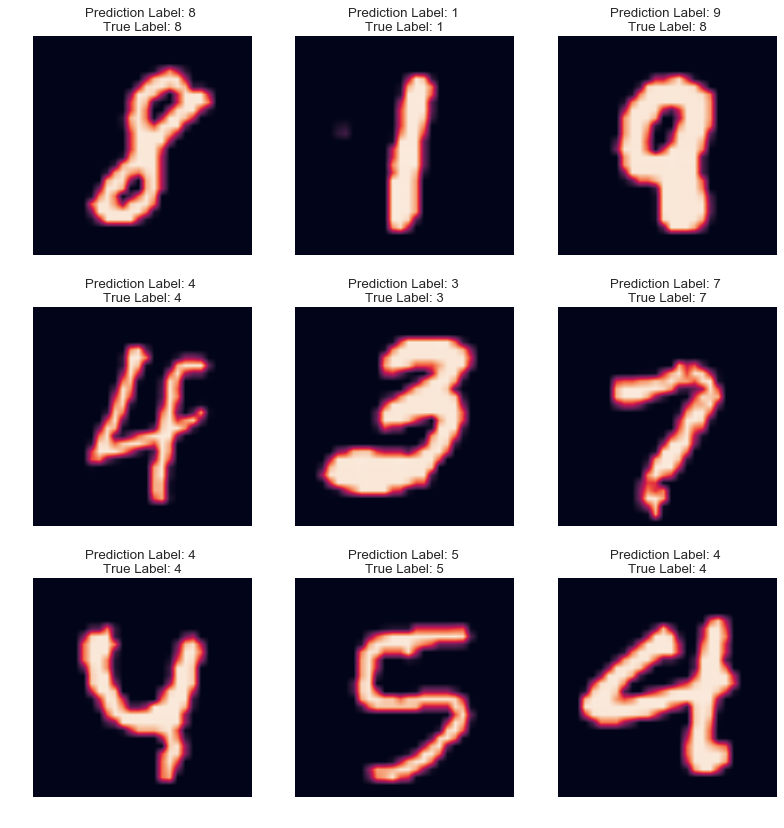

In [6]:

image_list = batch_xs[:9]
pred_list = np.zeros(len(image_list)).astype(int)
pct_list = np.zeros(len(image_list)).astype(int)


prob = y_final[:9]
true_label = np.argmax(batch_ys, 1)[:9]
# pct_list = 
adversarial = False

# Setup image grid
import math
cols = 3
rows = math.ceil(image_list.shape[0]/cols)

f, axs = plt.subplots(cols, rows, figsize=(12, 12))
axs = axs.ravel()
i = 0
for i in range(len(prob)):
    pred_list[i] = np.argmax(prob[i]) # for mnist index == classification
    pct_list[i] = prob[i][pred_list[i]]

    image = image_list[i].reshape(28,28)

    axs[i].set_title('Prediction Label: {0} \nTrue Label: {1}' \
                      .format(pred_list[i], 
                              true_label[i]))
    axs[i].imshow(image)
    axs[i].axis('off')
    i += 1
    # Only use when plotting original, partial deriv and adversarial images
    if (adversarial) & (i % 3 == 1): 
        axs[i].set_title("Adversarial \nPartial Derivatives")        


plt.show()

In [ ]:
image_list = batch_xs[:9]
pred_list = np.zeros(len(image_list)).astype(int)
pct_list = np.zeros(len(image_list)).astype(int)


prob = y_final[:9]
true_label = np.argmax(batch_ys, 1)[:9]
# pct_list = 
adversarial = False

# Setup image grid
import math
cols = 3
rows = math.ceil(image_list.shape[0]/cols)

f, axs = plt.subplots(cols, rows, figsize=(12, 12))
axs = axs.ravel()
i = 0
for i in range(len(prob)):
    pred_list[i] = np.argmax(prob[i]) # for mnist index == classification
    pct_list[i] = prob[i][pred_list[i]]

    image = image_list[i].reshape(28,28)

    axs[i].set_title('Prediction Label: {0} \nTrue Label: {1}' \
                      .format(pred_list[i], 
                              true_label[i]))
    axs[i].imshow(image)
    axs[i].axis('off')
    i += 1
    # Only use when plotting original, partial deriv and adversarial images
    if (adversarial) & (i % 3 == 1): 
        axs[i].set_title("Adversarial \nPartial Derivatives")        


plt.show()

In [38]:
def adv_plot_predictions(batch_xs, batch_ys, output_probs=True, adversarial=False):
    '''
    Evaluate images against trained model and plot images.
    If adversarial == True, replace middle image title appropriately
    Return probability list if output_probs == True
    '''
#     prob = y.eval(feed_dict={x: image_list, keep_prob: 1.0})
    prob = sess.run(y, feed_dict={x: batch_xs, y_: batch_ys, is_training: False})
    true_label = np.argmax(batch_ys, 1)
    
    pred_list = np.zeros(len(image_list)).astype(int)
    pct_list = np.zeros(len(image_list)).astype(int)
    
    # Setup image grid
    import math
    cols = 1
    rows = math.ceil(image_list.shape[0]/cols)

    f, axs = plt.subplots(cols, rows, figsize=(12, 12))
    axs = axs.ravel()
    i = 0
    for i in range(len(prob)):
        pred_list[i] = np.argmax(prob[i]) # for mnist index == classification
#         pct_list[i] = prob[i][pred_list[i]] * 100

        image = image_list[i].reshape(28,28)
       
        axs[i].set_title('Prediction Label: {0} \nTrue Label: {1}' \
                      .format(pred_list[i], 
                              true_label[i]))
        axs[i].imshow(image)
        axs[i].axis('off')
        i += 1
        # Only use when plotting original, partial deriv and adversarial images
        if (adversarial) & (i % 3 == 1): 
            axs[i].set_title("Adversarial \nPartial Derivatives")        

    plt.show()

    return prob if output_probs else None

In [18]:
import tensorflow.contrib.slim as slim
# Pick a random 2 image from first 1000 images 
# Create adversarial image and with target label 6
index_of_2s = np.nonzero(mnist.test.labels[0:1000][:,2])[0]
rand_index = np.random.randint(0, len(index_of_2s))
image_norm = mnist.test.images[index_of_2s[rand_index]]
image_norm = np.reshape(image_norm, (1, 784))
label_adv = [0,0,0,0,0,0,1,0,0,0] # one hot encoded, adversarial label 6

x_image = image_norm
y_label = label_adv
lr=0.2 
n_steps=5

original_image = x_image
probs_per_step = []

# Calculate loss, derivative and create adversarial image
# https://www.tensorflow.org/versions/r0.11/api_docs/python/train/gradient_computation
#     loss =  slim.losses.softmax_cross_entropy(y_label, y)

loss = slim.losses.softmax_cross_entropy(y,y_)


# loss =  tf.nn.softmax_cross_entropy_with_logits(labels=y_label, logits=y)
deriv = tf.gradients(loss, x)
image_adv = tf.stop_gradient(x - tf.sign(deriv)*lr/n_steps)
image_adv = tf.clip_by_value(image_adv, 0, 1) # prevents -ve values creating 'real' image

Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.


In [28]:
batch_size = 1
batch = mnist.test.next_batch(batch_size)
# index_of_2s = np.nonzero(mnist.test.labels[0:500][:,1])[0][0:10]
batch_xs = (batch[0] - (PIXEL_DEPTH / 2.0) / PIXEL_DEPTH)  # make zero-centered distribution as in mnist_data.extract_data()
batch_ys = batch[1]

# Get 10 2s [:,2] from top 500 [0:500], nonzero returns tuple, get index[0], then first 10 [0:10]
# index_of_2s = np.nonzero(mnist.test.labels[0:500][:,1])[0][0:10]
# x_batch = mnist.test.images[index_of_2s]

y_test = sess.run(y, feed_dict={x: batch_xs, y_: batch_ys, is_training: False})


In [32]:
dydx = sess.run(deriv, {x: batch_xs, keep_prob: 1.0})



InvalidArgumentError: You must feed a value for placeholder tensor 'MODE' with dtype bool
	 [[Node: MODE = Placeholder[dtype=DT_BOOL, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'MODE', defined at:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/anaconda3/lib/python3.6/asyncio/base_events.py", line 1434, in _run_once
    handle._run()
  File "/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-e76e36155540>", line 25, in <module>
    is_training = tf.placeholder(tf.bool, name='MODE')
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1735, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4925, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'MODE' with dtype bool
	 [[Node: MODE = Placeholder[dtype=DT_BOOL, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [20]:
y_test = sess.run(y, feed_dict={x: x_image, y_: y_label, is_training: False})

keep_prob = tf.placeholder(tf.float32)

dydx = sess.run(deriv, {x: x_image, keep_prob: 1.0}) # can't seem to access 'deriv' w/o running this
x_adv = sess.run(image_adv, {x: x_image, keep_prob: 1.0})

# Create darray of 3 images - orig, noise/delta, adversarial
x_image = np.reshape(x_adv, (1, 784))
img_adv_list = original_image
# img_adv_list = np.append(img_adv_list, dydx[0], axis=0)
img_adv_list = np.append(img_adv_list, x_image, axis=0)

# Print/plot images and return probabilities
probs = adv_plot_predictions(img_adv_list, output_probs=output_probs, adversarial=True)
probs_per_step.append(probs)



ValueError: Cannot feed value of shape (10,) for Tensor 'Placeholder_1:0', which has shape '(?, 10)'

In [68]:
# Mostly inspired by:
# https://codewords.recurse.com/issues/five/why-do-neural-networks-think-a-panda-is-a-vulture
import tensorflow.contrib.slim as slim
keep_prob = tf.placeholder(tf.float32)
# is_training = tf.placeholder(tf.bool, name='MODE')
def create_plot_adversarial_images(x_image, y_label, lr=0.1, n_steps=1, output_probs=False):
    
    original_image = x_image
    probs_per_step = []
    
    # Calculate loss, derivative and create adversarial image
    # https://www.tensorflow.org/versions/r0.11/api_docs/python/train/gradient_computation
#     loss =  slim.losses.softmax_cross_entropy(y_label, y)
    loss =  tf.nn.softmax_cross_entropy_with_logits(labels=y_label, logits=y)
    deriv = tf.gradients(loss, x)
    image_adv = tf.stop_gradient(x - tf.sign(deriv)*lr/n_steps)
    image_adv = tf.clip_by_value(image_adv, 0, 1) # prevents -ve values creating 'real' image
    
    
    
    for _ in range(n_steps):
        # Calculate derivative and adversarial image
        dydx = sess.run(deriv, {x: x_image, keep_prob: 1.0}) # can't seem to access 'deriv' w/o running this
        x_adv = sess.run(image_adv, {x: x_image, keep_prob: 1.0})
        
        # Create darray of 3 images - orig, noise/delta, adversarial
        x_image = np.reshape(x_adv, (1, 784))
        img_adv_list = original_image
        img_adv_list = np.append(img_adv_list, dydx[0], axis=0)
        img_adv_list = np.append(img_adv_list, x_image, axis=0)

        # Print/plot images and return probabilities
        probs = adv_plot_predictions(img_adv_list, output_probs=output_probs, adversarial=True)
        probs_per_step.append(probs) if output_probs else None
    
    return probs_per_step

In [70]:
# Pick a random 2 image from first 1000 images 
# Create adversarial image and with target label 6
index_of_2s = np.nonzero(mnist.test.labels[0:1000][:,2])[0]
rand_index = np.random.randint(0, len(index_of_2s))
image_norm = mnist.test.images[index_of_2s[rand_index]]
image_norm = np.reshape(image_norm, (1, 784))
label_adv = [0,0,0,0,0,0,1,0,0,0] # one hot encoded, adversarial label 6

In [71]:
# Plot adversarial images
# Over each step, model certainty changes from 2 to 6
adver_prob = create_plot_adversarial_images(image_norm, label_adv, lr=0.2, n_steps=5)

InvalidArgumentError: You must feed a value for placeholder tensor 'MODE' with dtype bool
	 [[Node: MODE = Placeholder[dtype=DT_BOOL, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'MODE', defined at:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/anaconda3/lib/python3.6/asyncio/base_events.py", line 1434, in _run_once
    handle._run()
  File "/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-e76e36155540>", line 25, in <module>
    is_training = tf.placeholder(tf.bool, name='MODE')
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1735, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4925, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'MODE' with dtype bool
	 [[Node: MODE = Placeholder[dtype=DT_BOOL, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
